<h1 align ='center'>Calculating Galaxy Distance Using Spectra </h1>
<h5 align = 'center'> 
    Author: K M Shariat Ullah  <br>
    Student, Electrical and Electronic Engineering, <br>
    Shahjalal University of Science and Technology <br>
    E-mail: cast.shariat@gmail.com
</h5>


In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.signal import find_peaks

649


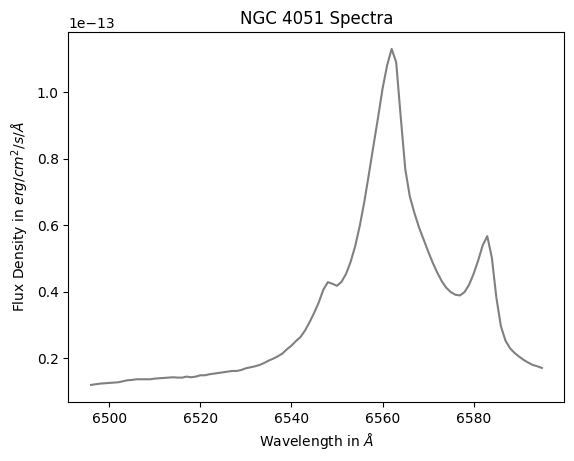

In [24]:
# load dataset
data = pd.read_csv('NGC_4051.csv')

# slicing to get the H alpha line
wave = data.wavelength[300:400]
intensity = data.intensity[300:400]
print(len(data))
plt.plot(wave, intensity, color='gray')
plt.title('NGC 4051 Spectra')
plt.xlabel('Wavelength in $\\AA$')
plt.ylabel('Flux Density in $erg/cm^2/s/\\AA$')
plt.show()

In [27]:
# finding the red shifted wavelenght at which H alpha line peaks

x = find_peaks(intensity, height=0.5e-13)
print(x)
print(f"Red Shifted H Alpha Line at: {wave[300+x[0][1]]} Angstorm with Intensity {intensity[300+x[0][1]]}")

(array([66, 87], dtype=int64), {'peak_heights': array([1.13e-13, 5.67e-14])})
Red Shifted H Alpha Line at: 6583 Angstorm with Intensity 5.67e-14


In [29]:
# calculating red shift value

wave_obs = 6583              # angstorm
wave_src = 6562.8               # angstorm

z = (wave_obs-wave_src)/wave_src
print(f"Redshift value z: {z:0.6f}")

# -------------------------
#          constant
# -------------------------

c = 299792458 
H_0 = 72                        # km/s / Mpc
d_act = 13.64                   # Mpc

# calculating receding velocity
v = c * z                       # m/s
v = v / 1000                    # km/s
print(f"Veloocity of NGC 4051: {v:0.2f}")

# calculating distance
d_spectra = v / H_0
print(f"Distance of NGC 4051: {d_spectra:0.2f}")

# calculating error
error = (d_act - d_spectra)/d_act * 100

print(f"Error: {error:0.2f}%")

Redshift value z: 0.003078
Veloocity of NGC 4051: 922.75
Distance of NGC 4051: 12.82
Error: 6.04%


<h1 align ='center'>Calculating Galaxy Distance Using Density Parameter </h1>
<h5 align = 'center'> 
    Author: K M Shariat Ullah  <br>
    Student, Electrical and Electronic Engineering, <br>
    Shahjalal University of Science and Technology <br>
    E-mail: cast.shariat@gmail.com
</h5>


In [30]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd 
from scipy.integrate import quad

In [31]:
# ---------------------
#      Constants
# ---------------------
c = 299792458                # m/s                     
H_0 = 72                     # km/s/Mpc
lambda_src = 6562.8          # Rest wavelength of H alpha line
lambda_obs = 6583            # Observed wavelength of H alpha line

# Updated matter density parameter (Planck 2018) 
omega_m = 0.3142  
omega_lambda = 0.6858 
omega_k = 0.001 

# Literature distance of NGC 1068
d_act = 13.64   
D_H = c / H_0

In [32]:
# red shift
z = (lambda_obs - lambda_src) / lambda_src
print(f"Redshift Value of NGC 1068: {z:.6f}")

                                
# Function E(z) from cosmology resource
def E(z):
    return np.sqrt(omega_m * (1 + z)**3 + omega_k * (1 + z)**2 + omega_lambda)

# Calculate comoving distance D_C
def comoving_distance(z):
    integral, _ = quad(lambda z_prime: 1 / E(z_prime), 0, z)
    return D_H * integral

# Compute the comoving distance for 3C 273
D_C = comoving_distance(z) / 1000
print(f"Comoving Distance of NGC_1068: {D_C:.2f} Mpc")

# error 
error_advanced = abs(D_C - d_act) / d_act * 100
print(f"Error is: {error_advanced:0.2f}%")


# two more distance

D_M = D_C                     # for Omega_k = 0
D_A = D_M / (1+z)
D_L = D_A * (1+z)**2

print(f"Angular Distance: {D_A:0.2f}")
print(f"Luminosity Distance: {D_L:0.2f}")

# error 
error_advanced = abs(D_A - d_act) / d_act * 100
print(f"Error (D_A): {error_advanced:0.2f}%")

# error 
error_advanced = abs(D_L - d_act) / d_act * 100
print(f"Error (D_A): {error_advanced:0.2f}%")

Redshift Value of NGC 1068: 0.003078
Comoving Distance of NGC_1068: 12.80 Mpc
Error is: 6.16%
Angular Distance: 12.76
Luminosity Distance: 12.84
Error (D_A): 6.44%
Error (D_A): 5.87%
